## Escalamiento de datos numéricos

La normalización es una técnica que a menudo se aplica como parte de la preparación de datos para el aprendizaje automático. El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos para usar una escala común, sin distorsionar las diferencias en los rangos de valores ni perder información. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente.

### Transformaciones lineales

In [1]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)

"""
Note: X tiene un shape de (442, 10) para nuestro estudio solo necesitamos una columna, 
buscamos tener un raw con shape (442, 1)

: toma todas las columnas y filas.
None indica la transformación del arreglo (newaxis)
2 Selecciona la 3ra columna de X.

"""

raw = X[:, None, 2]

raw


array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

### Escalamientos

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

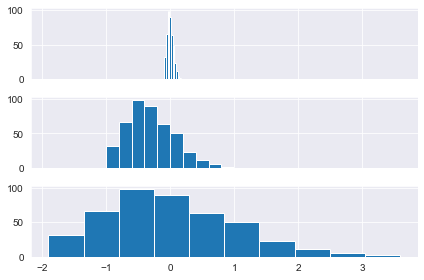

In [3]:
# escalamiento max-min

max_raw = max(raw)
min_raw = min(raw)
scaled_max_min = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

# sharex // compartan el eje X
fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

# Imprimiendo los datos inicialmente, y despues los escalados
axs[0].hist(raw)
axs[1].hist(scaled_max_min)
axs[2].hist(z_scaled)

In [4]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [5]:
# Calculando el tiempo a tomar
raw_time = timeit.timeit(train_raw, number = 100)

scaled_time = timeit.timeit(train_scaled, number = 100)

z_scaled_time = timeit.timeit(train_z_scaled, number = 100)

print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.0782933000000412 
trainning time for scaled data : 0.06516429999999218
trainning time for z_scaled data : 0.06839069999989533


## Notas para escoger el metodo para estandarizar los datos
* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales (sobre funciones no lineales)

¿Por qué usarlos?
En el caso donde haya datos fuertemente sesgados y no simétricos.

Logarítmica
Sigmoide
Polinomial
Trigonométrica

<img src="https://i.imgur.com/9e1gTmA.png">


In [8]:
df = pd.read_csv('./data/cars.csv')

<AxesSubplot:>

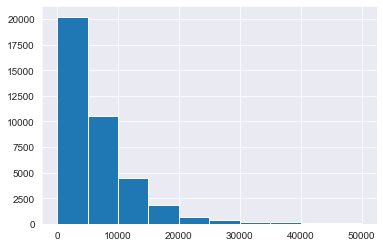

In [9]:
df.price_usd.hist()

## Transformacion hiperbolica
Transformación con $$tanh(x)$$

<AxesSubplot:>

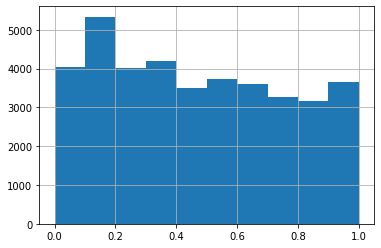

In [15]:
# Aplicando a la columna price_usd una transformacion con la funcion hiperbolica
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py
